In [26]:
import pandas as pd
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn import tree
import graphviz 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [27]:
ionosphere = pd.read_csv('dataR2.csv')
ionosphere.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [28]:
ionosphere.columns

Index(['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin',
       'Resistin', 'MCP.1', 'Classification'],
      dtype='object')

In [29]:
ionosphere.isna().sum()

Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64

In [30]:
X = ionosphere.iloc[:,1:10].values
y = ionosphere.iloc[:,0].values
print(y)

[48 83 82 68 86 49 89 76 73 75 34 29 25 24 38 44 47 61 64 32 36 34 29 35
 54 45 50 66 35 36 66 53 28 43 51 67 66 69 60 77 76 76 75 69 71 66 75 78
 69 85 76 77 45 45 49 34 42 68 51 62 38 69 49 51 59 45 54 64 46 44 45 44
 51 72 46 43 55 43 86 41 59 81 48 71 42 65 48 85 48 58 40 82 52 49 60 49
 44 40 71 69 74 66 65 72 57 73 45 46 68 75 54 45 62 65 72 86]


In [31]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [32]:
from sklearn.ensemble import RandomForestClassifier
randf=RandomForestClassifier(n_estimators=900)
randf.fit(X_train,y_train)
y_pred=randf.predict(X_test)

In [33]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix 
print(np.mean(y_pred != y_test))
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

1.0
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

          29       0.00      0.00      0.00       1.0
          34       0.00      0.00      0.00       1.0
          35       0.00      0.00      0.00       2.0
          36       0.00      0.00      0.00       1.0
          38       0.00      0.00      0.00       0.0
          40       0.00      0.00      0.00       0.0
          43       0.00      0.00      0.00       1.0
          44       0.00      0.00      0.00       1.0
          45       0.00      0.00      0.00       3.0
          46       0.00      0.00      0.00       0.0
          48       0.00      0.00      0.00       2.0
          49       0.00      0.00      0.00       2.0
          50       0.00      0.00      0.00       1.0
          51       0.00      0.00      0.00       1.0
          55       0.00      0.00      0.00       0.0
          5

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classif

In [34]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [35]:
randf.feature_importances_

array([0.12539502, 0.11705895, 0.10741251, 0.10867065, 0.12364935,
       0.11866718, 0.13049   , 0.13468003, 0.0339763 ])

In [36]:
features = ionosphere.columns.values.tolist()[1:10]
feature_pro = pd.Series(randf.feature_importances_,index=features).sort_values(ascending=False)

In [37]:
feature_pro

MCP.1             0.134680
Resistin          0.130490
BMI               0.125395
Leptin            0.123649
Adiponectin       0.118667
Glucose           0.117059
HOMA              0.108671
Insulin           0.107413
Classification    0.033976
dtype: float64

No handles with labels found to put in legend.


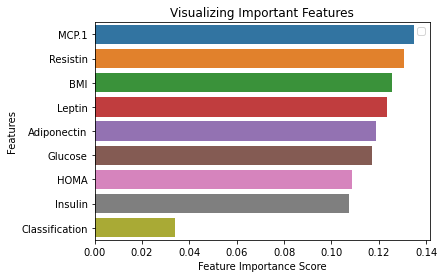

In [38]:
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_pro, y=feature_pro.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [39]:
ionosphere['Leptin'].describe()

count    116.000000
mean      26.615080
std       19.183294
min        4.311000
25%       12.313675
50%       20.271000
75%       37.378300
max       90.280000
Name: Leptin, dtype: float64

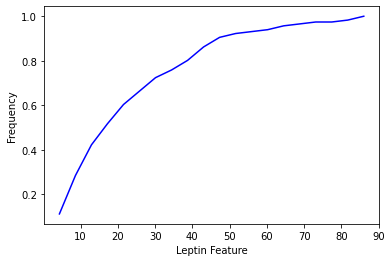

In [40]:
values, base = np.histogram(ionosphere['Leptin'], bins=20)
Accumalate = np.cumsum(values/ionosphere.shape[0])
plt.plot(base[:-1], Accumalate, c='blue')
plt.xlabel('Leptin Feature')
plt.ylabel('Frequency')
plt.show()

In [41]:
indeksDaarlig = ionosphere.loc[ionosphere['Leptin'] <= 21].index
indeksGod = ionosphere.loc[ionosphere['Leptin'] > 21].index
ionosphere.iloc[indeksDaarlig, ionosphere.columns.get_loc('Leptin')] = 0
ionosphere.iloc[indeksGod, ionosphere.columns.get_loc('Leptin')] = 1

In [42]:
ionosphere['Leptin'].value_counts()

0.0    59
1.0    57
Name: Leptin, dtype: int64

In [43]:
x = ionosphere.drop('Leptin',axis=1)
y = ionosphere['Leptin']

In [44]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.40, random_state = 40)

In [45]:
clfTre = tree.DecisionTreeClassifier(max_depth=3)
clfTre.fit(xTrain, yTrain)

DecisionTreeClassifier(max_depth=3)

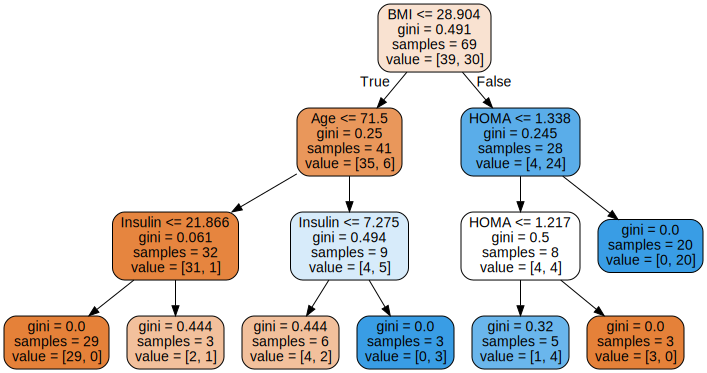

In [46]:
dot_data = tree.export_graphviz(clfTre, out_file=None, max_depth=3, feature_names=list(x.columns.values), filled=True, rounded=True)
valgTre = graphviz.Source(dot_data) 
valgTre

In [47]:
utfall = (clfTre.predict(xTest) == yTest).value_counts()
print("The Decision Tree predicts the test data in", (utfall[1]/(utfall[0]+utfall[1]))*100 , "% of the cases.")

The Decision Tree predicts the test data in 76.59574468085107 % of the cases.


In [48]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
rf.fit(xTrain, yTrain)

RandomForestClassifier(max_depth=10, random_state=0)

In [49]:
utfall = (rf.predict(xTest) == yTest).value_counts()
print("The Decision tree Predicts the test data in", (utfall[1]/(utfall[0]+utfall[1]))*100 , "% of the cases.")

The Decision tree Predicts the test data in 68.08510638297872 % of the cases.
